# CA-2
GitHub Repo Link- https://github.com/faisal3325/ai2-ca2

## Q1 Text Classification - 1
## Running Latent Dirichlet Allocation(LDA)

### Importing Libraries and Initializing project

In [183]:
# importing libraries
import pandas as pd # for dataframe
import time # for timer used to calculate execution time
import pickle # for exporting model

In [178]:
# Helper functions

# Timer functions for calculating execution time of models
def time_elapsed_start():
    # Starting the timer
    return time.time()

def time_elapsed_stop(start):
    # Stoping timer and calculating time in
    # seconds, minutes, and hours
    sec = time.time() - start
    min = sec/60
    hour = min/60
    print(f"Execution took {sec} seconds - ({min} minutes), ({hour} hours)")

def save_model(model, model_name):
    # Saving the model to disk
    filename = f'{model_name}.sav'
    pickle.dump(model, open(filename, 'wb'))

In [130]:
# loading data
ROWS_TO_READ = 200000 # total rows to read
df = pd.read_csv('quora_questions.csv', nrows=ROWS_TO_READ) # loading the dataset

In [131]:
df.sample(5)

,question
174726,Why does it take so long for amazon to ship?
154585,What is the best diet chart for a student prep...
35459,Is there a Drug and Alcohol Rehab Center in Ju...
2108,Is it possible for a mobile phone to explode?
94343,How beautifully life can be described?


In [132]:
for i in range(0, 10):
    print(df['question'][i])

What is the step by step guide to invest in share market in india?
What is the story of Kohinoor (Koh-i-Noor) Diamond?
How can I increase the speed of my internet connection while using a VPN?
Why am I mentally very lonely? How can I solve it?
Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?
Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?
Should I buy tiago?
How can I be a good geologist?
When do you use ã‚· instead of ã—?
Motorola (company): Can I hack my Charter Motorolla DCX3400?


In [133]:
# dataframe size
print(f"Dataframe size: {df.size}")

Dataframe size: 200000


### Pre-processing

Here we are using CountVectorizer to vectorize the questions. We are considering that a word should come in atleast 2 documents (min_df) and should not come in more than 90% of the documents (max_df). We are also removing stop words in this process.

In [134]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.9, min_df=2, stop_words='english')

In [135]:
start = time_elapsed_start()
term_matrix = count_vectorizer.fit_transform(df['question'])
time_elapsed_stop(start)

Execution took 3.311908483505249 seconds - (0.05519847472508748 minutes), (0.000919974578751458 hours)


In [136]:
term_matrix

<200000x50470 sparse matrix of type '<class 'numpy.int64'>'
	with 1004332 stored elements in Compressed Sparse Row format>

The vector has taken 50,470 words in the vocabulary from 2,00,000 questions(rows).

### Applying LDA

In [137]:
from sklearn.decomposition import LatentDirichletAllocation

Initializing LDA with 14 components, random state 3, and default learning decay 0.7

In [186]:
lda = LatentDirichletAllocation(n_components=14, random_state=3)

In [139]:
start = time_elapsed_start()
lda.fit(term_matrix)
time_elapsed_stop(start)

Execution took 442.35561871528625 seconds - (7.372593645254771 minutes), (0.12287656075424618 hours)


In [179]:
# Saving model
save_model(lda, 'lda_14_0.7')

Checking log likelihood, perplexity

In [140]:
start = time_elapsed_start()
log_likelihood = lda.score(term_matrix)
perplexity = lda.perplexity(term_matrix)
time_elapsed_stop(start)

Execution took 105.48867440223694 seconds - (1.7581445733706156 minutes), (0.029302409556176925 hours)


In [141]:
print(f"Log likelihood: {log_likelihood}")
print(f"Perplexity: {perplexity}")

Log likelihood: -8936056.746951483
Perplexity: 5736.284365840458


We have a got quite a low log likelihood (~ -8936057) which is a good value. We good perplexity (~5736) which is also quite low and is a good value.

In [184]:
# Creating a metrics dataframe for comparison later
lda_metrics_df = pd.DataFrame([[log_likelihood, perplexity, 14, 0.7]], columns=['log_likelihood', 'perplexity', 'n_components', 'learning_decay'])

In [185]:
lda_metrics_df

,log_likelihood,perplexity,n_components,learning_decay
0,-8.927290e+06,5687.786516,14,0.7


## Applying GridSearch for finding out best parameters for LDA

In [144]:
# importing GridSearchCV from sklearn.model_selection
from sklearn.model_selection import GridSearchCV

In [145]:
# creating parameters for LDA to run in GridSearch
params = {'n_components': [10, 12, 14], 'learning_decay': [.5, .7, .9]}

In [146]:
# Initializing evaluate LDA and passing parameters to it
eval_lda = LatentDirichletAllocation()
eval_lda = GridSearchCV(eval_lda, param_grid=params)

In [147]:
# Fitting the model
# this will search for optimal parameters
# Note: this process consumes a significant amount of time and resources
start = time_elapsed_start()
eval_lda.fit(term_matrix)
time_elapsed_stop(start)

C:\Users\faisa\Anaconda3\envs\AI2_course\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
Execution took 8361.387158870697 seconds - (139.35645264784495 minutes), (2.322607544130749 hours)


In [180]:
# saving model
save_model(eval_lda, 'eval_lda_gridsearch_10_12_14_.5_.7_.9')

In [148]:
# Finding the best parameters for LDA
best_lda_model = eval_lda.best_estimator_
print("Best Model's Params: ", eval_lda.best_params_)

Best Model's Params:  {'learning_decay': 0.9, 'n_components': 10}
Best Log Likelihood Score:  -3241856.4356800863
Model Perplexity:  5552.920307150242


In [149]:
# Using best parameters
lda = LatentDirichletAllocation(n_components=10, random_state=3, learning_decay=0.9)

In [150]:
start = time_elapsed_start()
lda.fit(term_matrix)
time_elapsed_stop(start)

Execution took 490.63956212997437 seconds - (8.177326035499572 minutes), (0.1362887672583262 hours)


In [181]:
save_model(lda, 'lda_10_.9')

In [151]:
start = time_elapsed_start()
log_likelihood = lda.score(term_matrix)
perplexity = lda.perplexity(term_matrix)
time_elapsed_stop(start)

Execution took 86.88231325149536 seconds - (1.4480385541915894 minutes), (0.024133975903193158 hours)


In [152]:
print(f"Log likelihood: {log_likelihood}")
print(f"Perplexity: {perplexity}")

Log likelihood: -8927290.074633548
Perplexity: 5687.786516240722


In [153]:
# storing metrics in metrics dataframe
lda_metrics_df.loc[-1] = [log_likelihood, perplexity, 12, 0.7]
lda_metrics_df.index = lda_metrics_df.index + 1
lda_metrics_df = lda_metrics_df.sort_index()

In [154]:
lda_metrics_df

,log_likelihood,perplexity,n_components,learning_decay
0,-8.927290e+06,5687.786516,12.0,0.7
1,-8.936057e+06,5736.284366,13.0,0.7


## Exploring topics and their words

We have 27,885 words in the vocabulary. 

In [155]:
lda.components_.shape

(10, 50470)

10 topics with 27,885 words

Exploring a random topic

In [156]:
random_topic = lda.components_[3]

In [157]:
import matplotlib.pyplot as plt

In [158]:
def show_chart(words, count, chart_title):
    d = pd.DataFrame({"Words": words, "Count": count})
    # Sort the dataframe by largest count
    d = d.sort_values(by=["Count"], ascending=False)
    ax = d.plot.bar(y="Count", x="Words", title=chart_title, figsize=(15, 10), legend=True, fontsize=12, rot=1)
    ax.set_xlabel("Frequent words", fontsize=12)
    ax.set_ylabel("Word count", fontsize=12)

class
learning
exam
good
world
college
science
difference
computer
prepare
language
programming
start
like
learn


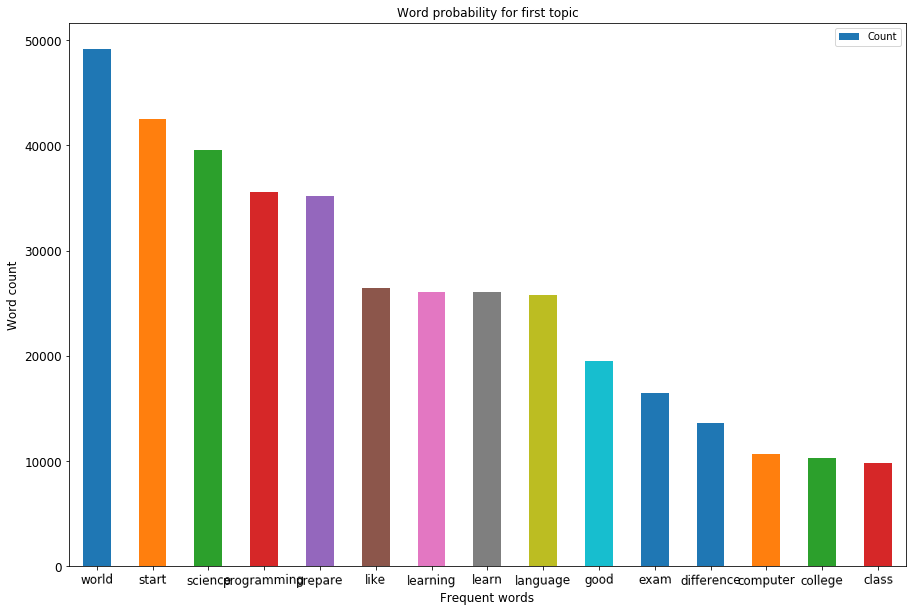

In [159]:
word_list = []
probability_list = []

for index in random_topic.argsort()[-15:]:
    frequent_word = count_vectorizer.get_feature_names()[index]
    print(frequent_word, sep=" ")
    word_list.append(frequent_word)
    probability_list.append(index)
    
show_chart(word_list, probability_list, "Word probability for first topic")

In [160]:
word_list = []
probability_list = []

top_number = 25
count = 0
for probability_number in lda.components_:
    text_message = f"Top words for topic {count} are : "
    print(text_message)    
    for number in probability_number.argsort()[-top_number:]:
        print([count_vectorizer.get_feature_names()[number]], end= "")
    print("\n")  
    count += 1

Top words for topic 0 are : 
['green']['cell']['pay']['come']['death']['compare']['battle']['phone']['cost']['machine']['exist']['believe']['google']['support']['number']['die']['really']['god']['movie']['time']['make']['com']['mean']['did']['does']

Top words for topic 1 are : 
['safe']['meaning']['skills']['laptop']['video']['india']['youtube']['website']['app']['earn']['read']['learn']['free']['buy']['book']['ways']['good']['books']['improve']['english']['online']['make']['money']['way']['best']

Top words for topic 2 are : 
['travel']['possible']['don']['password']['win']['girl']['does']['number']['going']['president']['hillary']['clinton']['like']['facebook']['lose']['weight']['sex']['day']['donald']['account']['things']['time']['love']['trump']['know']

Top words for topic 3 are : 
['war']['cat']['web']['study']['2016']['score']['want']['student']['girls']['experience']['class']['learning']['exam']['good']['world']['college']['science']['difference']['computer']['prepare']['langu

In [161]:
textfile_topics = lda.transform(term_matrix)

In [162]:
topic_list = []
# Textfile_topics is a list of arrays containing 
# all index positions of words for each textfile
for popular_index_pos in textfile_topics:
    # Get the max index position in each array
    # and add to the topic_list list
    topic_list.append(popular_index_pos.argmax())

# Add a new column to the dataframe
df["topic_num"] = topic_list

In [163]:
df

,question,topic_num
0,What is the step by step guide to invest in sh...,3
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,8
2,How can I increase the speed of my internet co...,4
3,Why am I mentally very lonely? How can I solve...,7
4,"Which one dissolve in water quikly sugar, salt...",5
5,Astrology: I am a Capricorn Sun Cap moon and c...,4
6,Should I buy tiago?,0
7,How can I be a good geologist?,4
8,When do you use ã‚· instead of ã—?,7
9,Motorola (company): Can I hack my Charter Moto...,5


In [164]:
df.loc[df['topic_num'] == 0].sample(5)

,question,topic_num
133573,Which is the best quickbooks auto data recover...,0
123328,How many workers died during the first Industr...,0
101929,What episodes of Supernatural has Jensen Ackle...,0
10584,What does SMTP do?,0
130708,Is led flash of phone is harms?,0


In [165]:
df.loc[df['topic_num'] == 1].sample(5)

,question,topic_num
151109,How do I make a good habit of reading a book?,1
60822,How much money does 500 Startups put for how m...,1
79051,What is the best way to reduce weight?,1
139578,What is the best way to make a fashion Lookboo...,1
26253,How do I make money fast and easy?,1


In [166]:
df.loc[df['topic_num'] == 2].sample(5)

,question,topic_num
106208,What happens if a passport arrives and no one ...,2
58567,Why am I consistently losing followers on Inst...,2
34847,How do I know someone's email address from a Y...,2
163502,Why should I not vote for Donald Trump?,2
68884,Is time travel possible in next 5 years?,2


In [167]:
df.loc[df['topic_num'] == 3].sample(5)

,question,topic_num
40454,Where can I find the multiple-choice questions...,3
135715,How shall I prepare for CA final Nov 16 exams,3
85539,"I have IELTS score of 7,CGPA is 7.2/10 in Indi...",3
138898,What are some real-life benefits from learning...,3
86140,How do you add wireless networking to a deskto...,3


In [168]:
df.loc[df['topic_num'] == 4].sample(5)

,question,topic_num
23974,What are the best places to visit in Goa?,4
66934,How do I stay motivated in life?,4
54197,Which are some of the best RTB engines?,4
17144,What is garden mulch?,4
117387,What is drag coefficient?,4


In [169]:
df.loc[df['topic_num'] == 5].sample(5)

,question,topic_num
144256,Why is it that I wake up as if someone woke me...,5
28980,How did Glenn Greenwald learn to speak Portugu...,5
104185,What is the news behind Rajnikant movie kabali...,5
189605,How can I eat less?,5
3061,How can anyone increase height?,5


In [170]:
df.loc[df['topic_num'] == 6].sample(5)

,question,topic_num
106082,"What is the best answer to the HR question,""Yo...",6
176932,Villanova Football Live Stream | Watch Villano...,6
95763,How can I join Indian army after BBA?,6
108258,What is dv^2/dt=?,6
12024,What is the difference between Apple's Mac and...,6


In [171]:
df.loc[df['topic_num'] == 7].sample(5)

,question,topic_num
110296,Does a replacement of 500/1000 rupee notes wit...,7
49233,What if Quora and Yahoo Answers went to war?,7
116910,How do you draw a realistic flower (step-by-st...,7
143243,What is a hash?,7
18260,How can you deal with a cat that is scared of ...,7


In [172]:
df.loc[df['topic_num'] == 8].sample(5)

,question,topic_num
169827,Are people from the Philippines considered Asi...,8
85527,What are some unusual aspects about politics a...,8
158043,Will West Bengal be the next Kashmir?,8
168744,What is the closest Latvian equivalent of the ...,8
20706,What do you think about Nikky Haley?,8


In [173]:
df.loc[df['topic_num'] == 9].sample(5)

,question,topic_num
179365,What does the orange light on a MacBook charge...,9
114142,Is there any selfless good deed?,9
141219,What does 3/4 + 5/8 equal?,9
159825,Can ips officer marryâ€¦?,9
157585,What will be the pay hike in TCS after ITA pro...,9


In [174]:
topic_list = {0: "Opinions", 
              1: "Recreation, Sports, Travel, and Activities", 
              2: "Quora", 
              3: "Finances/Earning Money", 
              4: "Life", 
              5: "World Politics", 
              6: "Learning, Programming, and Education", 
              7: "US Presedential Elections", 
              8: "Career and Motivation", 
              9: "Relationship"}

topic = df["topic_num"].map(topic_list)
df["topic"] = topic

In [175]:
df.head(25)

,question,topic_num,topic
0,What is the step by step guide to invest in sh...,3,Finances/Earning Money
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,8,Career and Motivation
2,How can I increase the speed of my internet co...,4,Life
3,Why am I mentally very lonely? How can I solve...,7,US Presedential Elections
4,"Which one dissolve in water quikly sugar, salt...",5,World Politics
5,Astrology: I am a Capricorn Sun Cap moon and c...,4,Life
6,Should I buy tiago?,0,Opinions
7,How can I be a good geologist?,4,Life
8,When do you use ã‚· instead of ã—?,7,US Presedential Elections
9,Motorola (company): Can I hack my Charter Moto...,5,World Politics


In [176]:
df.to_csv('lda_modelled.csv')